In [1]:
import numpy as np
import sys

from ExternalFunctions import Chi2Regression

from scipy.stats import chi2

In [2]:
def calculate_weighted_mean(data, uncertainties):
    return np.sum(data/uncertainties**2)/np.sum(1./uncertainties**2)

def calculate_uncertainty(uncertainties):
    return np.sqrt(1./np.sum(1./uncertainties**2))

In [3]:
g_exp = np.array([9.54, 9.36, 10.02, 9.87, 9.98, 9.86, 9.86, 9.81, 9.79])
sigma_g_exp = np.array([0.15, 0.10, 0.11, 0.08, 0.14, 0.06, 0.03, 0.13, 0.04])

g_mean = calculate_weighted_mean(g_exp, sigma_g_exp)
sigma_g_mean = calculate_uncertainty(sigma_g_exp)

print(f'g = {g_mean:.2f} +- {sigma_g_mean:.2f}')

g = 9.82 +- 0.02


In [4]:
def calculate_chi2(y, sigma_y, f):
    """Calculate the chi2 for when the function is a constant value, in this case g"""
    return np.sum( (y - f )**2 / sigma_y**2 )

chi2_value = calculate_chi2(g_exp, sigma_g_exp, g_mean)
print(f'Chi2 = {chi2_value:.1f}')

Ndof = len(g_exp) - 1 # 1 degree of freedom is used for calculating the mean (i.e. for performing the 'fit')
chi2_prob = chi2.sf(chi2_value, Ndof)
print(f'Chi2 p-value = {chi2_prob:.6f}')

Chi2 = 32.4
Chi2 p-value = 0.000079


In [5]:
import matplotlib.pyplot as plt

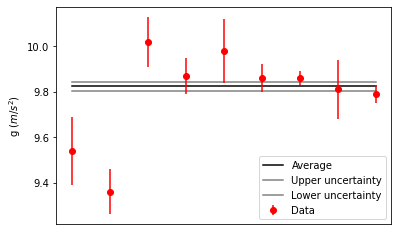

In [6]:
x_axis = np.arange(len(g_exp))
fig,ax = plt.subplots()
ax.plot([0, x_axis[-1]],[g_mean, g_mean], color='black', label='Average')
ax.plot([0, x_axis[-1]],[g_mean+sigma_g_mean, g_mean+sigma_g_mean], color='grey', label='Upper uncertainty')
ax.plot([0, x_axis[-1]],[g_mean-sigma_g_mean, g_mean-sigma_g_mean], color='grey', label='Lower uncertainty')
ax.errorbar(x_axis,g_exp, yerr=sigma_g_exp, color='red', label='Data', marker='o', ls='None',zorder=4)

ax.set_ylabel(r'g ($m/s^2$)')
ax.set_xticks([])
plt.legend(loc='lower right')
plt.show()